In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [15]:
cmap_list = ["#440154ff", "#440558ff", "#450a5cff", "#450e60ff", "#451465ff", "#461969ff",
 "#461d6dff", "#462372ff", "#472775ff", "#472c7aff", "#46307cff", "#45337dff",
 "#433880ff", "#423c81ff", "#404184ff", "#3f4686ff", "#3d4a88ff", "#3c4f8aff", 
 "#3b518bff", "#39558bff", "#37598cff", "#365c8cff", "#34608cff", "#33638dff",
 "#31678dff", "#2f6b8dff", "#2d6e8eff", "#2c718eff", "#2b748eff", "#29788eff",
 "#287c8eff", "#277f8eff", "#25848dff", "#24878dff", "#238b8dff", "#218f8dff",
 "#21918dff", "#22958bff", "#23988aff", "#239b89ff", "#249f87ff", "#25a186ff",
 "#25a584ff", "#26a883ff", "#27ab82ff", "#29ae80ff", "#2eb17dff", "#35b479ff",
 "#3cb875ff", "#42bb72ff", "#49be6eff", "#4ec16bff", "#55c467ff", "#5cc863ff",
 "#61c960ff", "#6bcc5aff", "#72ce55ff", "#7cd04fff", "#85d349ff", "#8dd544ff",
 "#97d73eff", "#9ed93aff", "#a8db34ff", "#b0dd31ff", "#b8de30ff", "#c3df2eff",
 "#cbe02dff", "#d6e22bff", "#e1e329ff", "#eae428ff", "#f5e626ff", "#fde725ff"]

### Params for plotting

In [19]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)

fontlabelsize = 24
ticklabelsize = 20

In [21]:
phimax = 6.25
delta_phi = 0.025
fluxvalues = np.arange(-phimax, phimax + delta_phi, delta_phi)
qpcfile = '/home/nefta/thesis/results/qpc-current.dat'
qpcdata = pd.read_csv(qpcfile, header=None)[0].values

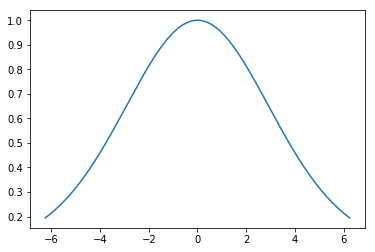

In [9]:
fig, ax = plt.subplots()
ax.plot(fluxvalues, qpcdata)

In [10]:
from scipy.optimize import curve_fit

def gaussian(x, a, mu, b):
    return a * np.exp( - (x -mu)**2 /(2*b))

In [12]:
coeff, var_matrix = curve_fit(gaussian, fluxvalues, qpcdata)
a, mu, b = coeff
fit = [gaussian(x, a, mu, b) for x in fluxvalues]

In [13]:
a, mu, b

(0.98608380872685031, 2.3214564641937022e-06, 10.831058920551648)

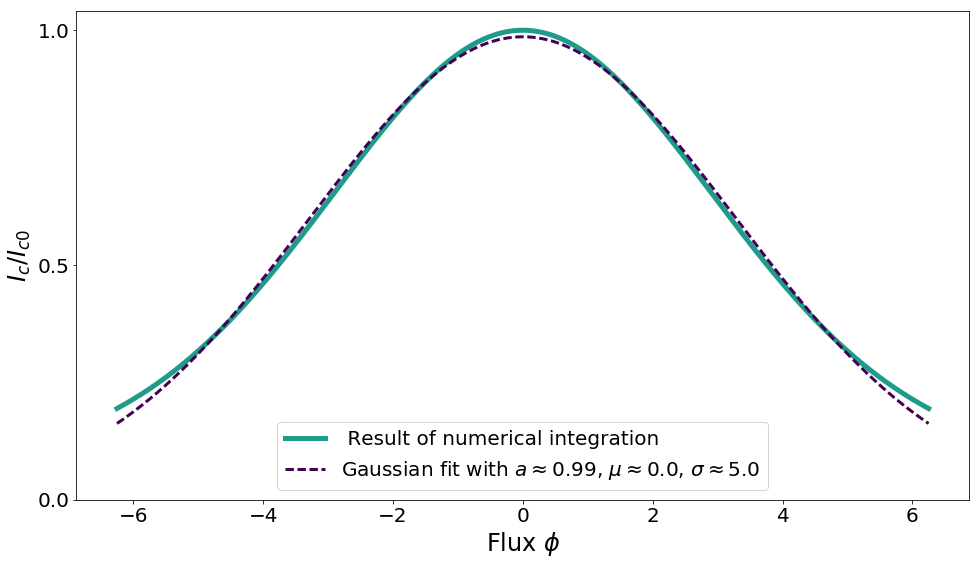

In [31]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(fluxvalues, qpcdata, color=cmap(140), linewidth=5, label=' Result of numerical integration')
ax.plot(fluxvalues, fit, color=cmap(0), linewidth=3, 
        label=r'Gaussian fit with $a \approx {0}$, $\mu \approx {1}$, $\sigma \approx {2}$'.format(
            round(a, 2), round(mu, 2), round(b/2)), linestyle='--')

ax.legend(prop={'size': 20})
ax.set_xlabel(r'Flux $\phi$', fontsize=fontlabelsize)
ax.set_ylabel(r'$I_c / I_{c0}$', fontsize=fontlabelsize)

ax.xaxis.set_ticks(np.arange(-round(phimax), round(phimax)+1, 2))
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks([1, 0.5, 0])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#fig.savefig('qpc-numerical-integration-fit.eps')

In [113]:
from math import exp, pi, atan

In [32]:
def exp_limit_2(x, phi):
    f1 = exp(- pi * phi / (2 * x))
    f2 = (phi * pi / (2 * x))**(3/2)
    f3 = (1 + x**2)**(3/2) / (x + (1 + x**2) * atan(x))
    f4 = pi**(3/2) / (8 * x**2)
    return f1 * f2 *f3 *f4

In [116]:
highfields = [exp_limit_2(3, phi) for phi in np.arange(0, 10.01, 0.1)]
fit_halt = [gaussian(phi, a, mu, b) for phi in np.arange(0, 10.01, 0.1)]

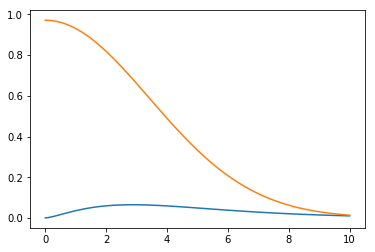

In [117]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, 10.01, 0.1), highfields)
ax.plot(np.arange(0, 10.01, 0.1), fit_halt)

In [2]:
from math import modf

In [27]:
def ic(phi, tau):
    frac = abs(modf(phi)[0])
    if phi > 0:
        return tau * (1- frac) * frac / abs(phi)
    else:
        return - tau * (frac - 1) * frac / abs(phi)

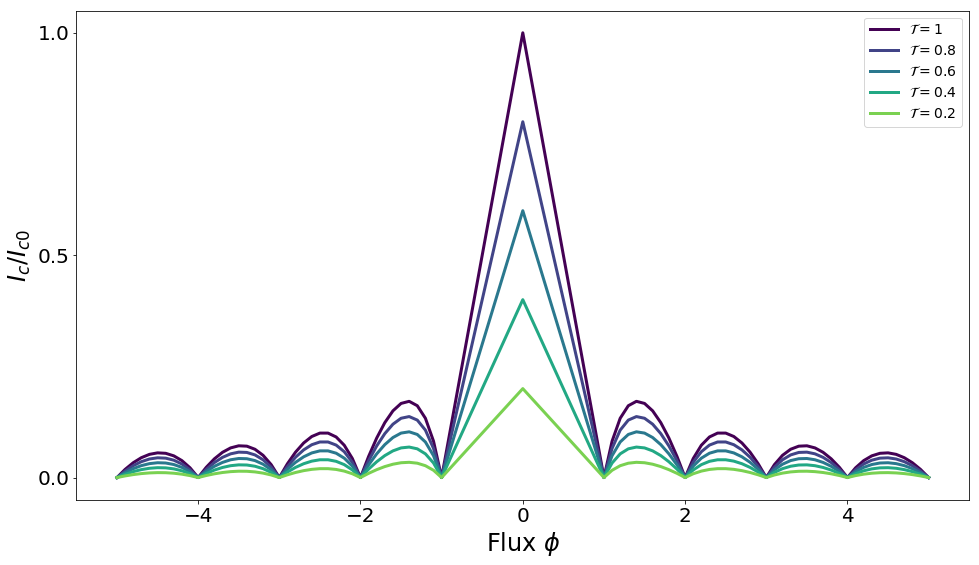

In [52]:
fig, ax = plt.subplots(figsize=(16, 9))
fluxvalues = np.arange(-5, 5.01, 0.1)
tvals = [1, 0.8, 0.6, 0.4, 0.2]

fontlabelsize = 24
ticklabelsize = 20

ax.xaxis.set_ticks([-4, -2, 0, 2, 4])
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks([1, 0.5, 0])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)

for index, tau in enumerate(tvals):
    res = [ic(phi, tau) for phi in fluxvalues]
    ax.plot(fluxvalues, res, color=cmap(index * round(cmap.N / len(tvals))), linewidth=3,
           label=r'$\mathcal{{T}} = {}$'.format(tau))
ax.legend(prop={'size': 14})
ax.set_xlabel(r'Flux $\phi$', fontsize=fontlabelsize)
ax.set_ylabel(r'$I_c / I_{c0}$', fontsize=fontlabelsize)

#fig.savefig('ic_vs_tau.eps')